<a href="https://colab.research.google.com/github/GabrielFFranco/Mackenzie_IA_Deep_Learning/blob/main/Tarefa_de_Aprofundamento_Trilha_4_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificação de Dogras**
## **Aluno: Gabriel Ferreira Franco**

O dataset escolhido para atividade determina qual tipo de medicamento o paciente deve tomar baseado na sua idade, sexo, pressão arterial, nivel de colesterol e o nivel de sódio e potassio no sangue.

Dataset disponível em: https://www.kaggle.com/prathamtripathi/drug-classification


Código disponível em: https://github.com/GabrielFFranco/Mackenzie_IA_Deep_Learning/blob/main/Tarefa_de_Aprofundamento_Trilha_4_Deep_Learning.ipynb

In [54]:
#Fazendo as importações das bibliotecas.
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [55]:
#Carregando dataset e exibindo.
df = pd.read_csv("https://raw.githubusercontent.com/Rogerio-mack/work/main/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [56]:
#Verificando se há valores nulos.
print(df.isnull().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [57]:
#Fazendo a discretização das colunas "Sex", "BP", "Cholesterol"
coluna = ["BP", "Cholesterol"]
for col in coluna:
  dummies = pd.get_dummies(df[col], prefix=col)
  df = pd.concat([df, dummies], axis = 1)
  df.drop(columns=[col], inplace=True)
df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})
df.head()

,Age,Sex,Na_to_K,Drug,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,0,25.355,DrugY,1,0,0,1,0
1,47,1,13.093,drugC,0,1,0,1,0
2,47,1,10.114,drugC,0,1,0,1,0
3,28,0,7.798,drugX,0,0,1,1,0
4,61,0,18.043,DrugY,0,1,0,1,0


In [58]:
#Padronizando os dados
X = scale(df.drop(columns=["Drug"]))
print(X)

[[-1.29159102 -1.040833    1.28652212 ... -0.64686916  0.97043679
  -0.97043679]
 [ 0.16269866  0.96076892 -0.4151454  ... -0.64686916  0.97043679
  -0.97043679]
 [ 0.16269866  0.96076892 -0.82855818 ... -0.64686916  0.97043679
  -0.97043679]
 ...
 [ 0.46567567  0.96076892 -0.85908883 ...  1.54590766  0.97043679
  -0.97043679]
 [-1.29159102  0.96076892 -0.28650033 ...  1.54590766 -1.03046381
   1.03046381]
 [-0.26146916 -1.040833   -0.6571702  ... -0.64686916 -1.03046381
   1.03046381]]


In [59]:
#Fazendo a discretização dos valores alvos
y = pd.get_dummies(df["Drug"])
y.head(9)

,DrugY,drugA,drugB,drugC,drugX
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,1
4,1,0,0,0,0
5,0,0,0,0,1
6,1,0,0,0,0
7,0,0,0,1,0
8,1,0,0,0,0


In [60]:
#Dividindo o dataset entre o conjunto de treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## **Modelo de Rede Neural:**
Decidi usar uma rede neural de 3 camadas ocultas, usei a função de custo 'categorical_crossentropy' por se tratar de um modelo multiclasse. A função de ativiação e o otimizador foram escolhidos aleatóriamente.

In [61]:
#Declarando as camadas e neurônios do modelo
model = keras.Sequential([
    layers.Dense(15, activation='relu', input_shape=[8]),
    layers.Dense(10, activation='relu'),
    layers.Dense(5, activation='sigmoid'),
])

In [62]:
#Compilando o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
#Definindo condições de parada
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

#Treinando o modelo
history = model.fit(
    X_train, y_train,
    batch_size=32,
    validation_split=0.4,
    epochs=200,
    callbacks=[early_stopping],
    verbose=0,  
)

In [64]:
#Função auxiliar para exibir o resultado obtido
def display_acc_hist(history):
  history_df = pd.DataFrame(history.history)
  display(history_df.head())
  # Start the plot at epoch 0
  history_df.loc[0:, ['loss', 'val_loss']].plot()
  history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()

  print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))
  return

,loss,accuracy,val_loss,val_accuracy
0,1.631094,0.107143,1.690605,0.178571
1,1.612331,0.107143,1.670876,0.178571
2,1.593887,0.107143,1.652842,0.160714
3,1.576956,0.154762,1.636046,0.160714
4,1.560690,0.190476,1.620375,0.160714


Best Validation Loss: 0.3256
Best Validation Accuracy: 0.8571


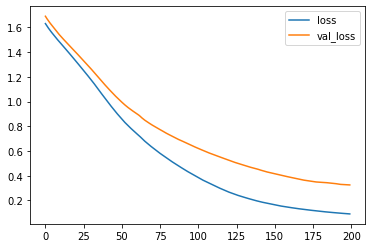

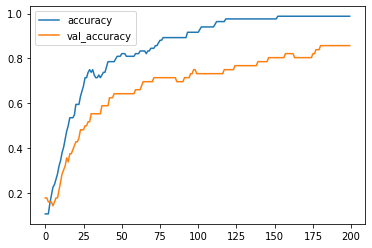

In [65]:
display_acc_hist(history)

In [66]:
#Testando o modelo
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test = np.argmax(y_test.values, axis=1)

#Função auxiliar para exibir os resultados do teste
def print_results(y_test, y_pred):
  print('Matriz de Confusão: \n' , confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  print('Acuracidade: ' , accuracy_score(y_test, y_pred))
  return
  
print_results(y_test, y_pred)

Matriz de Confusão: 
 [[30  0  1  1  0]
 [ 0  4  2  0  0]
 [ 1  1  4  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 12]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.80      0.67      0.73         6
           2       0.57      0.67      0.62         6
           3       0.80      1.00      0.89         4
           4       1.00      1.00      1.00        12

    accuracy                           0.90        60
   macro avg       0.83      0.85      0.84        60
weighted avg       0.91      0.90      0.90        60

Acuracidade:  0.9


Concluo que com a acuracidade obtida, o algoritmo é confiavel o suficiente para predizer qual remédio o paciente deve tomar.